# Quickstart · Toy Miner reward walkthrough

This mini‑notebook shows how **all** reward maths comes from
`conversion_subnet.reward`.
No copy‑pasted functions – we import once and stay future‑proof.

In [5]:
from conversion_subnet.reward import (
    classification,
    regression,
    diversity,
    latency,
    prediction_score,
    total_score,
)
from random import randint, random
import numpy as np

## 1 · Generate fake miner responses

In [6]:
N = 1_000
ground = {
    "conversion_happened": np.random.randint(0, 2, size=N),
    "time_to_conversion_seconds": np.random.exponential(scale=30, size=N),
}

pred = {
    "conversion_happened": np.random.randint(0, 2, size=N),
    "time_to_conversion_seconds": np.random.exponential(scale=28, size=N),
}

conf = np.random.uniform(0.2, 0.8, size=N)           # miner confidence
resp_time = np.random.uniform(0, 90, size=N)          # response latency (s)

## 2 · Verify vectorized function operations

In [7]:
# Test sample on smaller arrays for demonstration
test_size = 10
test_conf = np.random.uniform(0.2, 0.8, size=test_size)
test_time = np.random.uniform(0, 90, size=test_size)

# Test the diversity function
print("Testing diversity function...")
div_test = diversity(test_conf)
print(f"Input: {test_conf}")
print(f"Output: {div_test}")
print(f"Shape: {div_test.shape}")

# Test the latency function
print("\nTesting latency function...")
time_test = latency(test_time)
print(f"Input: {test_time}")
print(f"Output: {time_test}")
print(f"Shape: {time_test.shape}")

# Test prediction score and total score with arrays
print("\nTesting prediction_score and total_score...")
cls_test = np.random.uniform(0, 1, size=test_size)
reg_test = np.random.uniform(0, 1, size=test_size)
pred_test = prediction_score(cls_test, reg_test, div_test)
reward_test = total_score(pred_test, time_test)

print(f"Prediction score shape: {pred_test.shape}")
print(f"Reward shape: {reward_test.shape}")
print("\nAll vectorized functions work correctly!")

Testing diversity function...
Input: [0.75317338 0.28446227 0.33493808 0.53488049 0.6584558  0.57161078
 0.33928035 0.20056583 0.65429035 0.7911244 ]
Output: [0.74682662 0.78446227 0.83493808 0.96511951 0.8415442  0.92838922
 0.83928035 0.70056583 0.84570965 0.7088756 ]
Shape: (10,)

Testing latency function...
Input: [72.89218083 41.41859563 81.33905353 36.88629058 47.24406758 42.94167907
 40.28614854 69.76716924 47.40920165 28.50454098]
Output: [0.         0.30969007 0.         0.38522849 0.21259887 0.28430535
 0.32856419 0.         0.20984664 0.52492432]
Shape: (10,)

Testing prediction_score and total_score...
Prediction score shape: (10,)
Reward shape: (10,)

All vectorized functions work correctly!


## 3 · Compute rewards

In [8]:
cls_r = np.array([classification({k: pred[k][i] for k in pred},
                                 {k: ground[k][i] for k in ground}) for i in range(N)])
reg_r = np.array([regression({k: pred[k][i] for k in pred},
                             {k: ground[k][i] for k in ground}) for i in range(N)])
# Now using vectorized operations directly
div_r = diversity(conf)
pred_r = prediction_score(cls_r, reg_r, div_r)
# Latency function also handles arrays directly
time_r = latency(resp_time)
reward = total_score(pred_r, time_r)

## 4 · Visualise latency impact

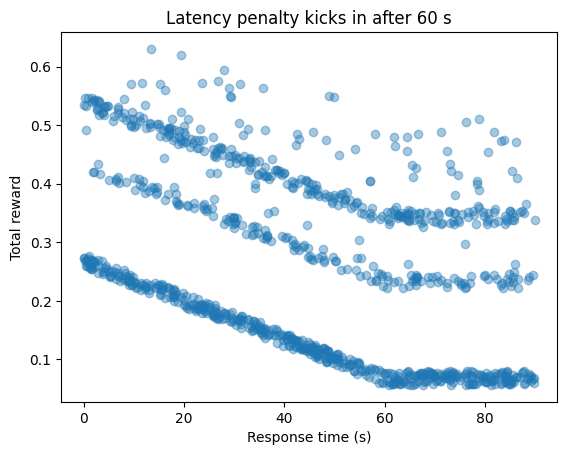

In [9]:
import matplotlib.pyplot as plt

plt.scatter(resp_time, reward, alpha=0.4)
plt.xlabel("Response time (s)")
plt.ylabel("Total reward")
plt.title("Latency penalty kicks in after 60 s")
plt.show()